# Tutorial for Quantitative LEIS Analysis by SpecRec Python Package

## Energy losses of atoms during single elastic scattering

### Basics of LEIS

![header](https://github.com/mauveferret/SpecRec/blob/main/docs/pics/LEIS_Scheme.png?raw=true)


Low-Energy Ion Scattering (LEIS) is a surface analysis technique that involves bombarding a sample with low-energy ions and analyzing the energy of the scattered ions. The energy losses of the scattered and recoiled particles can be described using the following formulas:

For a scattered particle:
$$ E_s = E_0 \left( \frac{m \cos(\Theta) + \sqrt{M^2 - m^2 \sin^2(\Theta)}}{m + M} \right)^2 $$

For a recoiled particle:
$$ E_r = E_0 \left( \frac{2 m M \cos(\Theta)}{(m + M)^2} \right) $$

where:
- $E_s$ is the energy of the scattered particle
- $E_r$ is the energy of the recoiled particle
- $E_0$ is the initial energy of the incident ion
- $m$ is the mass of the incident ion
- $M$ is the mass of the target atom
- $\Theta$ is the scattering angle

These formulas are essential for understanding the kinematics of elastic scattering in LEIS and for identifying the elements present in the sample based on their energy losses.

This repository provides tools for quantitative Low-Energy Ion Scattering (LEIS) analysis. It includes modules for restoring spectra distorted by electrostatic energy separators and for quantifying LEIS spectra. The tools facilitate the analysis of energy spectra, enabling the identification and quantification of elements in a sample. This notebook is intended to show the main features of this repository, which can be distinguished in two separate modules: the library for the restoration of spectra after distortion due to electrostatic energy separators and the library for LEIS spectra quantification.

In the first example, you can see the use of basic methods of the `leis_tools.py` library, which allow the calculation of some kinematics of elastic scattering, including the angle of scattering, energy losses, and identification of target masses by energy losses.


In [1]:
import os, sys
#change path to working directory
BASE_LIB_PATH = "tools"
sys.path.insert(1, os.getcwd()+os.sep+BASE_LIB_PATH)
import LEIS_tools as leis

incidentElement = "Ne"
E0 = 15000 # eV
scattering_angle = 32 # degrees
targetElement1 = "Au"
targetElement2 = "Pd"
dE = 10
mu = leis.get_mass_by_element(targetElement1)/leis.get_mass_by_element(incidentElement)

print("-------- LEIS peak position calculation ---------")
Peak_position1 = leis.get_energy_by_angle( E0, leis.get_mass_by_element(targetElement1)/leis.get_mass_by_element(incidentElement), scattering_angle)/1000
print(f"The peak position for {targetElement1} is {Peak_position1:.2f} keV")
Peak_position2 = leis.get_energy_by_angle( E0, leis.get_mass_by_element(targetElement2)/leis.get_mass_by_element(incidentElement), scattering_angle)/1000
print(f"The peak position for {targetElement2} is {Peak_position2:.2f} keV")
calculated_mass1 = leis.get_target_mass_by_energy(scattering_angle, leis.get_mass_by_element(incidentElement),E0, Peak_position1*1000)
print(f"The energy losses of  {E0-Peak_position1*1000:.2f} eV corresponds to {calculated_mass1:.2f} a.m.u., which can be an "+
      leis.get_element_by_mass(calculated_mass1)+" element")
print("-------------------------------------------------")


-------- LEIS peak position calculation ---------
The peak position for Au is 14.54 keV
The peak position for Pd is 14.16 keV
The energy losses of  460.18 eV corresponds to 196.97 a.m.u., which can be an Au element
-------------------------------------------------


### Differential Scattering Cross-Section

For elemental LEIS analysis, we only need formulas for elastic scattering kinematics, which can be obtained using energy and momentum conservation laws. For quantitative analysis, however, we also need the calculation of sensitivity factors, in particular, the differential scattering cross-section. 

The quantification of LEIS spectra can be performed using the formula described by [Brongersma et al.](https://doi.org/10.1016/j.surfrep.2006.12.002) in their papers. The formula for the quantification is given by:

$$ I_i = N_i \cdot \sigma_i \cdot Y_i \cdot \Omega \cdot T_i $$

where:
- $N_i$ is the atomic density of element $i$ in the sample
- $\sigma_i$ is the differential scattering cross-section for element $i$
- $Y_i$ is the yield of element $i$
- $\Omega$ is the solid angle of detection
- $T_i$ is the transmission factor for element $i$

It can be calculated for the specific screened Coulomb potential using the method described in [this paper](https://www.sciencedirect.com/science/article/abs/pii/0029554X80904401). This package utilizes that formula to calculate cross-sections, which can be seen in the following example.


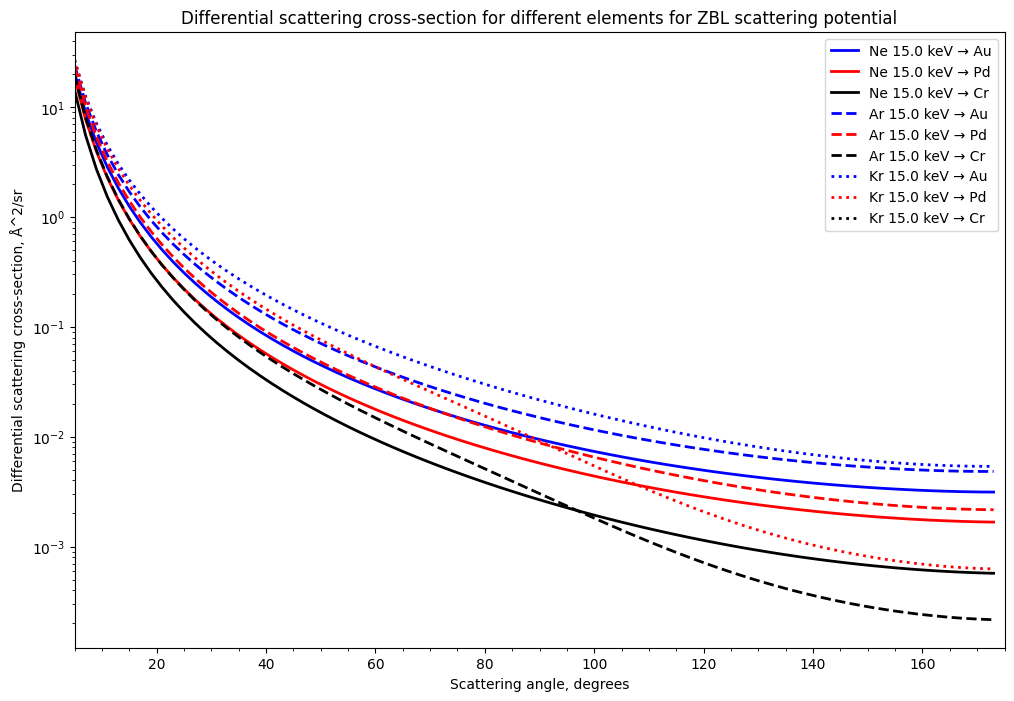

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
#change path to working directory
BASE_LIB_PATH = "tools"
sys.path.insert(1, os.getcwd()+os.sep+BASE_LIB_PATH)
import LEIS_tools as leis
# set the potential to ZBL for differential cross section calculation. 
# TFM and KRC are also available
leis.set_potential("ZBL")

incidentElement = "Ne"
E0 = 15000 # eV
targetElement1 = "Au"
targetElement2 = "Pd"
targetElement3 = "Cr"

plt.figure(figsize=(12, 8))
incident_elements = ["Ne", "Ar", "Kr"]   
target_elements = ["Au", "Pd", "Cr"]
colors = ['blue', 'red', 'black']
line_styles = ['-', '--', ':']
angles = range(5, 175, 2)

for incident_element in incident_elements:
    for target_element in target_elements:
        cross_sections = np.zeros(len(angles))
        for angle in angles:
            if not (incident_element == "Kr" and target_element == "Cr"):
                
                # here we calcualte the cross section for each angle
                dBeta = 2
                cross_sections[angles.index(angle)] = leis.get_cross_section(incident_element, E0, angle, dBeta, target_element)
                
        plt.plot(angles, cross_sections, linestyle = line_styles[incident_elements.index(incident_element)], 
                         linewidth=2, color = colors[target_elements.index(target_element)], 
                         label=f'{incident_element} {E0/1000:.1f} keV → {target_element}')
plt.xlim(5, 175)
plt.yscale('log')
plt.ylabel('Differential scattering cross-section, Å^2/sr')
plt.xlabel('Scattering angle, degrees')
plt.title('Differential scattering cross-section for different elements for ZBL scattering potential')
plt.legend()
plt.minorticks_on()
plt.show() 

### Dependence of peak intensity in LEIS on the detection angle

However, the sensitivity to different elements in LEIS is not determined only by cross-section and charge fraction but also by the energy width of the spectrometer at each registration point. From the energy equations, it can be obtained that:

$$ \frac{\Delta E}{\Delta \Theta} = \frac{2E \sin \Theta}{\sqrt{(M/m)^2 - (\sin \Theta)^2}} $$

In this way, if one uses the intensity of the peaks, they should consider the real detection area for a specific target element at the energy position of the peak for elastic scattering. In the case of using areas of the peaks for quantification, the detection area would be determined only by the spectrometer's diaphragm width and would be equal for all target elements. In the following example, you can see a comparison of the sensitivity factors due to cross-section and detection solid angle.




<Figure size 1200x800 with 0 Axes>

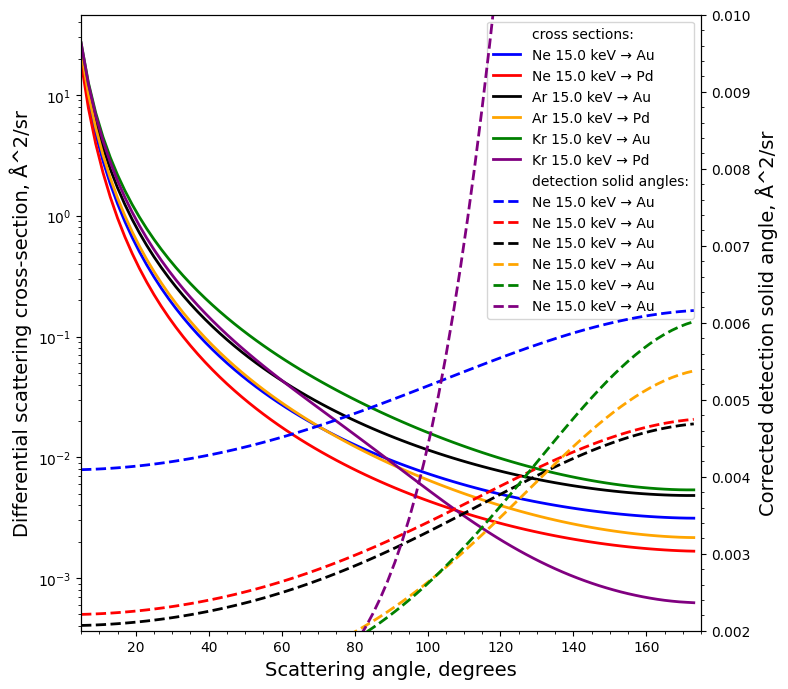

In [3]:
import numpy as np
import matplotlib.pyplot as plt
incidentElement = "Ne"
E0 = 15000 # eV
targetElement1 = "Au"
targetElement2 = "Pd"
dE = 2 # eV

incident_elements = ["Ne", "Ar", "Kr"]
target_elements = ["Au", "Pd"]
colors = ['blue', 'red', 'black', 'orange', 'green', 'purple']
angles = range(5, 175, 2)

plt.figure(figsize=(12, 8))
fig, ax1 = plt.subplots(figsize=(8, 8))
ax2 = ax1.twinx()
ax1.plot([], [], ' ', label="cross sections:")
ax2.plot([], [], ' ', label="detection solid angles:")

i=0
for incident_element in incident_elements:
    for target_element in target_elements:
        cross_sections = np.zeros(len(angles))
        dBeta = np.zeros(len(angles))
        for angle in angles:
            cross_sections[angles.index(angle)] = leis.get_cross_section(incident_element, E0,angle,2, target_element)
            dBeta[angles.index(angle)] = leis.get_dSigma( E0, angle, leis.get_mass_by_element(target_element)/leis.get_mass_by_element(incident_element), dE)

        ax1.plot(angles, cross_sections, linestyle = "-", linewidth=2, color = colors[i], 
                         label=f'{incident_element} {E0/1000:.1f} keV → {target_element}')
        ax2.plot(angles, dBeta, linestyle = "--", linewidth=2, color=colors[i], label=f'{incidentElement} {E0/1000:.1f} keV → {targetElement1}')
        i+=1

plt.xlim(5, 175)
ax1.set_yscale('log')
ax2.set_ylim(0.002, 0.01)
ax2.set_yscale('linear')
ax1.set_ylabel('Differential scattering cross-section, Å^2/sr', fontsize=14)
ax2.set_ylabel('Corrected detection solid angle, Å^2/sr', fontsize=14)
ax1.set_xlabel('Scattering angle, degrees', fontsize=14)
plt.minorticks_on()
# Add legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# Combine legends
lines_combined = lines + lines2
labels_combined = labels + labels2
ax1.legend(lines_combined, labels_combined, loc='upper right')
plt.show() 

Actually we can plot correction factor $ \Delta E / \Delta \Theta $ for all $mu = M/m$ and all angles for dE=2.0 eV:

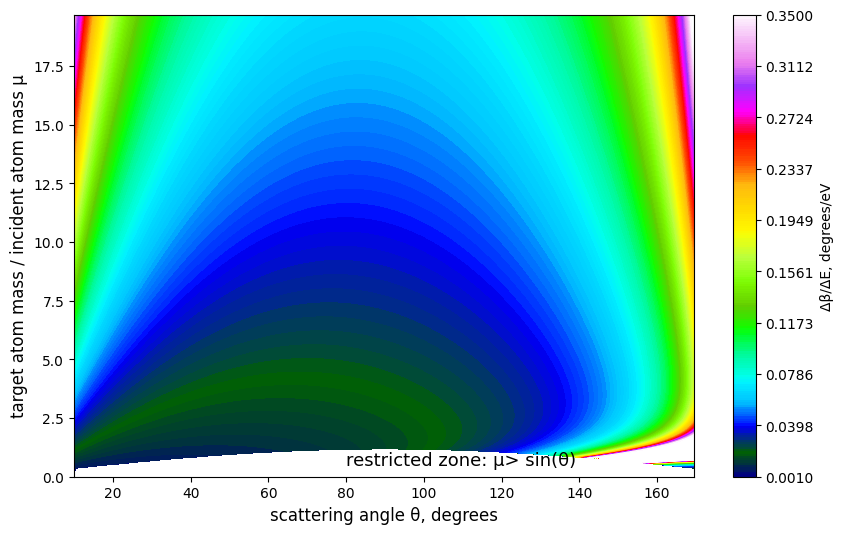

In [4]:
leis.plot_dBeta_map()

### Example of automated LEIS analysis of spectra simulated in SDTrimSP_6.02

Now lets try to provide automated LEIS analysis of some energy spectra, preliminary simulated in SDTrimSP Monte-Carlo code to repeat experimental studies from    [this paper](https://doi.org/10.1039/C4EE01497A)

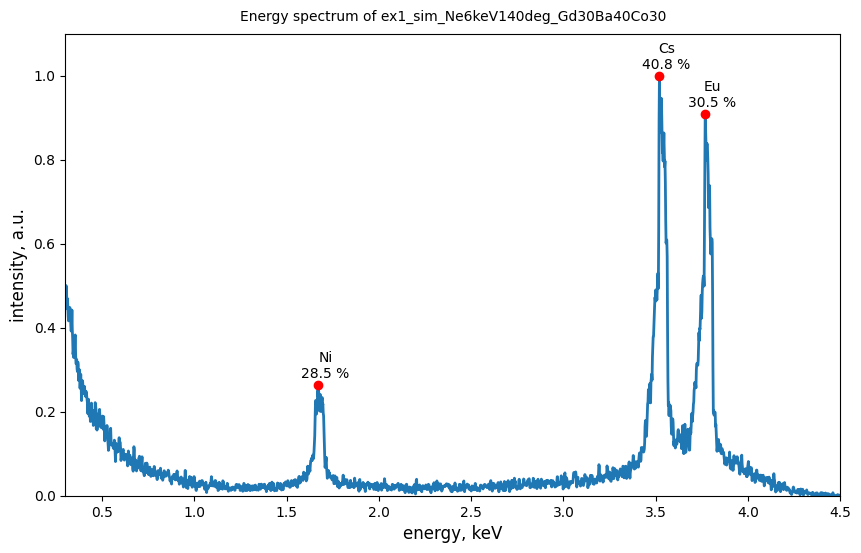

In [5]:
import os, sys
#change path to working directory
BASE_LIB_PATH = "tools"
sys.path.insert(1, os.getcwd()+os.sep+BASE_LIB_PATH)
import LEIS_tools as leis
spectrum_path0 = os.getcwd()+os.sep+"raw_data"+os.sep
spectrum_path0 += "ex1_sim_Ne6keV140deg_GdBaCo"+os.sep+ "Gd30Ba40Co30.dat"

data = leis.spectrum(spectrum_path0, 10)
data.do_elemental_analysis()
leis.Emax = 4500
leis.plot_spectrum_with_concs(data, title="Energy spectrum of "+
                              spectrum_path0.split(os.sep)[-2][:-7]+"_"+data.calc_name)

From the example above, it can be seen that element analysis is not very precise. Mass resolution in LEIS is limited by the width of the peaks, which fundamentally cannot be below the energy width due to the solid angle, as shown above. However, usually, one knows approximately what elements can be in the sample. For example, Eu is unlikely to be in our GdBaCo sample. At the same time, Eu is a neighbor of Gd, which is expected to be in the spectrum. Since their masses and atomic numbers are very close, the quantitative analysis would not be significantly affected by this mistake in automated element identification (but it would be due to several reasons, which will be mentioned below). Anyway, as can be seen, automated quantitative analysis has shown concentrations very close to the real values.

Let's see another example for the AuPd sample:

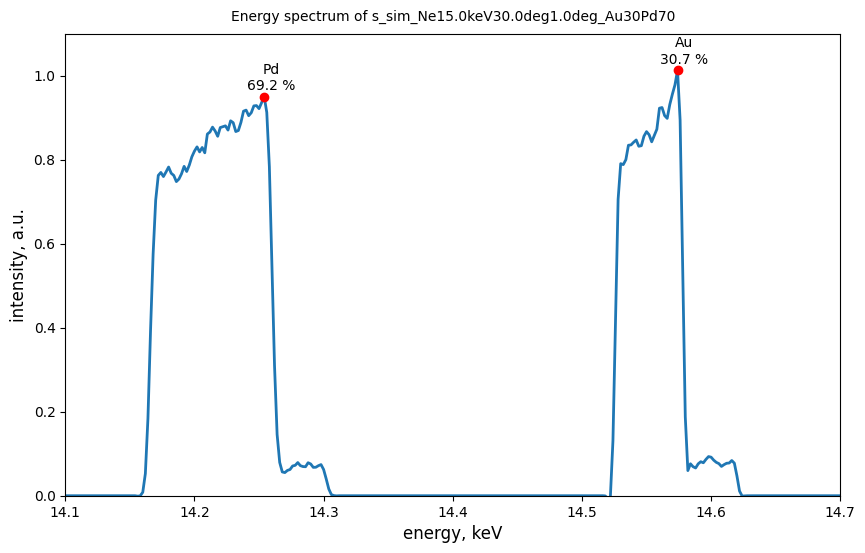

In [6]:
import os, sys
#change path to working directory
BASE_LIB_PATH = "tools"
sys.path.insert(1, os.getcwd()+os.sep+BASE_LIB_PATH)
import LEIS_tools as leis
spectrum_path0 = os.getcwd()+os.sep+"raw_data"+os.sep
spectrum_path0 +="sim_AuPd"+os.sep+"sim_Ne15.0keV30.0deg1.0deg_Au30Pd70.dat"

data = leis.spectrum(spectrum_path0,10)
data.do_elemental_analysis()
leis.Emin = 14100
leis.Emax = 14700

leis.plot_spectrum_with_concs(data, title="Energy spectrum of "+
                              spectrum_path0.split(os.sep)[-2][:-7]+"_"+data.calc_name)

One of the unique features of LEIS, in comparison to other techniques highly sensitive to the very surface layers (like XPS or AES), is the capability of flexible beam adjustment to achieve better performance. The use of different incident ions allows achieving different mass resolutions, as shown below.

Different ions can be used in LEIS to optimize the analysis for specific applications. For example:
- **Neon (Ne)** ions are often used for general surface analysis due to their moderate mass and energy.
- **Argon (Ar)** ions, being heavier than neon, provide better mass resolution and are useful for analyzing heavier elements.
- **Krypton (Kr)** ions, being even heavier, offer the highest mass resolution and are ideal for distinguishing between elements with very close atomic masses.

Meanwhile it should be kept in mind, that for incidents of higher masses the broadening due to constant dE is more prominent and that scattering is limited by $\mu > sin \Theta $ condition. The matrix effects also might be more prominent.
By selecting the appropriate ion, researchers can tailor the LEIS analysis to their specific needs, improving the accuracy and sensitivity of the measurements.

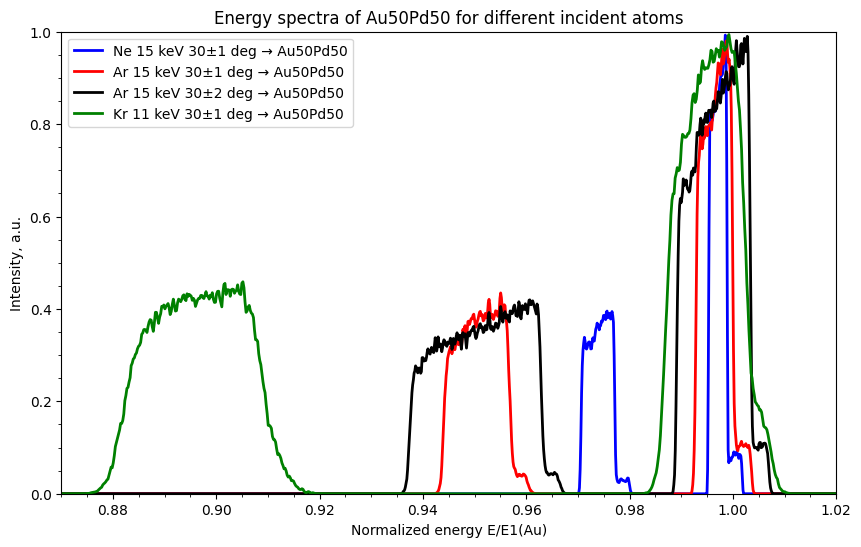

In [7]:
import os, sys
import matplotlib.pyplot as plt
#change path to working directory
BASE_LIB_PATH = "tools"
sys.path.insert(1, os.getcwd()+os.sep+BASE_LIB_PATH)
import LEIS_tools as leis

leis.Emin = 1000
spectrum_path0 = os.getcwd()+os.sep+"raw_data"+os.sep+"sim_AuPd"+os.sep
colors = ["blue", "red", "black", "green"]
calcs = ["sim_Ne15.0keV30.0deg1.0deg_Au50Pd50.dat", "sim_Ar15.0keV30.0deg1.0deg_Au50Pd50.dat",
         "sim_Ar15.0keV30.0deg2.0deg_Au50Pd50.dat", "sim_Kr11.0keV30.0deg1.0deg_Au50Pd50.dat"]

plt.figure(figsize=(10, 6))

for calc in calcs:
    data = leis.spectrum(spectrum_path0+calc, 10)
    # get position of the peak for Au to normalize spectrum by E1
    x_norm1 = leis.get_energy_by_angle(data.E0, leis.get_mass_by_element("Au")/leis.get_mass_by_element(data.incident_atom), data.scattering_angle)
    plt.plot(data.spectrum_en/x_norm1, data.spectrum_int,  color = colors[calcs.index(calc)], linewidth=2, label=
         f"{data.incident_atom} {int(data.E0/1000)} keV {int(data.scattering_angle)}±{int(data.dTheta)} deg → Au50Pd50")

plt.xlim(0.87,1.02)
plt.ylim(0, 1)
plt.xlabel("Normalized energy E/E1(Au)")
plt.ylabel("Intensity, a.u.")
plt.title("Energy spectra of Au50Pd50 for different incident atoms")
plt.legend()
plt.minorticks_on()
plt.legend()

## Quantitative analysis of experimental spectra

Now lets try to analyze real spectrum obtained in the Large mass-monochromator Mephi facility aka [Crocodile](https://github.com/mauveferret/croco)

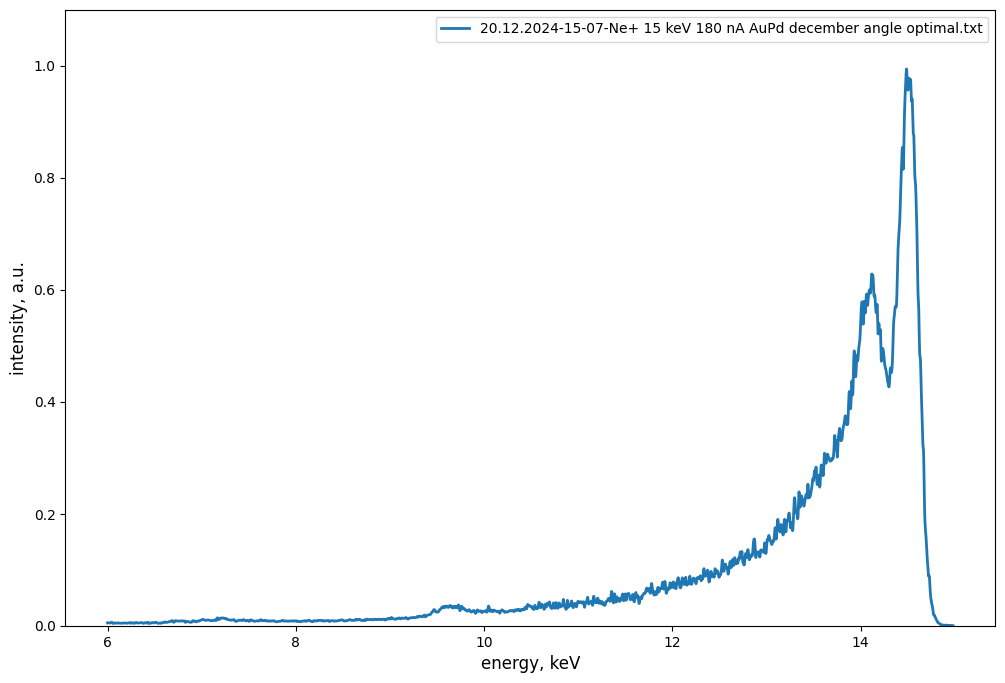

In [8]:
import matplotlib.pyplot as plt

spectrum_path0 = os.getcwd()+os.sep+"raw_data"+os.sep+"exp_AuPd"+os.sep
exp_spectra = os.listdir(spectrum_path0)

spectrum_path = next(path for path in exp_spectra if "15-07" in path)

Emin = 6000
Emax = 15000

data = leis.spectrum(spectrum_path0+spectrum_path, 20)

young_fitting = leis.fitted_spectrum(data, "Pd", "Au")

plt.figure(figsize=(12, 8))
plt.plot(data.spectrum_en[int(Emin/data.step):]/1000, data.spectrum_int[int(Emin/data.step):], '-', linewidth=2, label=data.calc_name)
#plt.plot(data.spectrum_en[int(Emin/data.step):]/1000, young_fitting.get_fitted_spectrum, '--', linewidth=2, color="red", label="Fitted spectrum") 

plt.xlabel('energy, keV', fontsize=12)
#plt.xlim (Emin/1000, Emax/1000)
plt.ylabel('intensity, a.u.', fontsize=12)
plt.ylim(0, 1.1)
plt.minorticks_on
plt.legend()
plt.show()


# IN PROGRESS ....
